In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

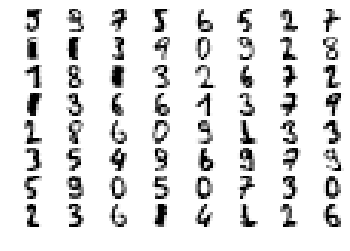

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1, class2):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = 2

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])


    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])


    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("Class1:{} #class1:{}".format(class1,len(class1_label)))
    print("Class2:{} #class2:{}".format(class2,len(class2_label)))

    samplesize = len(class1_label) + len(class2_label)
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 33)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
#class1 = [0, 2, 4, 6, 8]
#winner1 = get_winner(class1)

In [7]:
winner_list = []

for class1 in range(0,9):
    for class2 in range(class1+1, 10):
        winner = get_winner(class1, class2)
        winner_list.append(winner)

Class1:0 #class1:162
Class2:1 #class2:163

 ****** Running generation 0 ****** 

Population's average fitness: 0.51066 stdev: 0.18045
Best fitness: 0.95385 - size: (2, 13) - species 6 - id 97
Average adjusted fitness: 0.424
Mean genetic distance 2.883, standard deviation 0.451
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 7.435 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61146 stdev: 0.18768
Best fitness: 0.97846 - size: (3, 14) - species 18 - id 326
Average adjusted fitness: 0.557
Mean genetic distance 2.895, standard deviation 0.462
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 8.536 sec (7.986 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.66803 stdev: 0.18847
Best fitness: 0.97846 - size: (3, 14) - species 18 - id 326
Average adjusted fitness: 0.530
Mean genetic distance 2.950, standard deviation 0.490
Population of 201 members in 24 species
Total extincti

Population's average fitness: 0.80711 stdev: 0.19324
Best fitness: 0.99692 - size: (5, 20) - species 28 - id 2109
Average adjusted fitness: 0.325
Mean genetic distance 3.288, standard deviation 0.542
Population of 204 members in 20 species
Total extinctions: 0
Generation time: 11.034 sec (12.140 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.80762 stdev: 0.19061
Best fitness: 0.99692 - size: (7, 25) - species 7 - id 3831
Average adjusted fitness: 0.352
Mean genetic distance 3.285, standard deviation 0.542
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 11.201 sec (12.117 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.82000 stdev: 0.19694
Best fitness: 0.99692 - size: (7, 25) - species 7 - id 3831
Average adjusted fitness: 0.795
Mean genetic distance 3.281, standard deviation 0.547
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 11.026 sec (12.001 average)

 **

Mean genetic distance 3.140, standard deviation 0.445
Population of 197 members in 44 species
Total extinctions: 0
Generation time: 9.776 sec (9.646 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.76823 stdev: 0.20287
Best fitness: 0.99689 - size: (4, 19) - species 23 - id 1728
Average adjusted fitness: 0.620
Mean genetic distance 3.157, standard deviation 0.446
Population of 202 members in 43 species
Total extinctions: 0
Generation time: 9.991 sec (9.683 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.78759 stdev: 0.20032
Best fitness: 0.99689 - size: (4, 19) - species 23 - id 1728
Average adjusted fitness: 0.643
Mean genetic distance 3.172, standard deviation 0.447
Population of 196 members in 43 species
Total extinctions: 0
Generation time: 10.431 sec (9.773 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.78811 stdev: 0.19711
Best fitness: 0.99689 - size: (4, 19) - species 23 - id 1728

Population's average fitness: 0.70048 stdev: 0.20430
Best fitness: 0.99071 - size: (3, 15) - species 33 - id 603
Average adjusted fitness: 0.582
Mean genetic distance 3.095, standard deviation 0.456
Population of 206 members in 36 species
Total extinctions: 0
Generation time: 8.502 sec (8.404 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.70043 stdev: 0.20622
Best fitness: 0.99071 - size: (2, 14) - species 29 - id 1222
Average adjusted fitness: 0.612
Mean genetic distance 3.117, standard deviation 0.458
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 9.029 sec (8.482 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.73224 stdev: 0.19590
Best fitness: 0.99071 - size: (7, 21) - species 26 - id 1348
Average adjusted fitness: 0.434
Mean genetic distance 3.164, standard deviation 0.472
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 8.547 sec (8.489 average)

 ****** Ru

Mean genetic distance 3.075, standard deviation 0.487
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 7.610 sec (7.074 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.67346 stdev: 0.17583
Best fitness: 0.99387 - size: (4, 17) - species 8 - id 942
Average adjusted fitness: 0.498
Mean genetic distance 3.121, standard deviation 0.493
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 7.498 sec (7.145 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.68123 stdev: 0.18658
Best fitness: 0.99387 - size: (4, 17) - species 8 - id 942
Average adjusted fitness: 0.581
Mean genetic distance 3.127, standard deviation 0.506
Population of 192 members in 41 species
Total extinctions: 0
Generation time: 7.688 sec (7.222 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.69645 stdev: 0.17721
Best fitness: 0.99387 - size: (4, 17) - species 8 - id 942
Average a

Population's average fitness: 0.76809 stdev: 0.19051
Best fitness: 0.99692 - size: (3, 12) - species 17 - id 1454
Average adjusted fitness: 0.522
Mean genetic distance 3.154, standard deviation 0.474
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 7.035 sec (6.705 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.79686 stdev: 0.18465
Best fitness: 0.99692 - size: (3, 12) - species 17 - id 1454
Average adjusted fitness: 0.749
Mean genetic distance 3.152, standard deviation 0.461
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 7.179 sec (6.838 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.79065 stdev: 0.19207
Best fitness: 0.99692 - size: (3, 12) - species 17 - id 1454
Average adjusted fitness: 0.723
Mean genetic distance 3.165, standard deviation 0.460
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 7.468 sec (6.982 average)

 ******

Mean genetic distance 3.119, standard deviation 0.520
Population of 190 members in 36 species
Total extinctions: 0
Generation time: 6.800 sec (6.572 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.71434 stdev: 0.20069
Best fitness: 0.99060 - size: (7, 22) - species 6 - id 1431
Average adjusted fitness: 0.506
Mean genetic distance 3.134, standard deviation 0.516
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 6.674 sec (6.582 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.73080 stdev: 0.19563
Best fitness: 0.99060 - size: (7, 22) - species 6 - id 1431
Average adjusted fitness: 0.440
Mean genetic distance 3.129, standard deviation 0.516
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 7.100 sec (6.743 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.74547 stdev: 0.19304
Best fitness: 0.99060 - size: (3, 14) - species 22 - id 1681
Ave

Population's average fitness: 0.67246 stdev: 0.15213
Best fitness: 0.94118 - size: (4, 17) - species 20 - id 647
Average adjusted fitness: 0.436
Mean genetic distance 3.027, standard deviation 0.464
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 6.910 sec (6.403 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.67990 stdev: 0.15525
Best fitness: 0.95356 - size: (4, 18) - species 27 - id 1211
Average adjusted fitness: 0.489
Mean genetic distance 3.067, standard deviation 0.465
Population of 207 members in 33 species
Total extinctions: 0
Generation time: 6.915 sec (6.467 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.67904 stdev: 0.15310
Best fitness: 0.95356 - size: (4, 18) - species 27 - id 1211
Average adjusted fitness: 0.363
Mean genetic distance 3.102, standard deviation 0.467
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 7.053 sec (6.532 average)

 ****** Ru

Population's average fitness: 0.73751 stdev: 0.17545
Best fitness: 0.96285 - size: (4, 20) - species 5 - id 4164
Average adjusted fitness: 0.463
Mean genetic distance 3.136, standard deviation 0.493
Population of 191 members in 28 species
Total extinctions: 0
Generation time: 7.689 sec (7.685 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.74889 stdev: 0.16012
Best fitness: 0.96594 - size: (9, 29) - species 3 - id 4329
Average adjusted fitness: 0.279
Mean genetic distance 3.174, standard deviation 0.502
Population of 194 members in 27 species
Total extinctions: 0
Generation time: 8.299 sec (7.786 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.75219 stdev: 0.17242
Best fitness: 0.96904 - size: (10, 32) - species 3 - id 4475
Average adjusted fitness: 0.538
Mean genetic distance 3.178, standard deviation 0.505
Population of 192 members in 27 species
Total extinctions: 0
Generation time: 8.335 sec (7.865 average)
Class1:1 #

Population's average fitness: 0.74406 stdev: 0.15774
Best fitness: 0.99085 - size: (6, 23) - species 26 - id 2022
Average adjusted fitness: 0.336
Mean genetic distance 3.199, standard deviation 0.530
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 7.577 sec (7.512 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.72236 stdev: 0.16131
Best fitness: 0.99085 - size: (6, 23) - species 26 - id 2022
Average adjusted fitness: 0.379
Mean genetic distance 3.241, standard deviation 0.506
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 7.848 sec (7.593 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.72917 stdev: 0.16365
Best fitness: 0.99085 - size: (6, 23) - species 26 - id 2022
Average adjusted fitness: 0.304
Mean genetic distance 3.279, standard deviation 0.508
Population of 191 members in 29 species
Total extinctions: 0
Generation time: 7.920 sec (7.654 average)

 ******

Population's average fitness: 0.68557 stdev: 0.15540
Best fitness: 0.95370 - size: (3, 15) - species 15 - id 366
Average adjusted fitness: 0.464
Mean genetic distance 3.148, standard deviation 0.506
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 6.898 sec (6.713 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.67524 stdev: 0.16061
Best fitness: 0.95370 - size: (3, 15) - species 15 - id 366
Average adjusted fitness: 0.436
Mean genetic distance 3.160, standard deviation 0.510
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 6.937 sec (6.760 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.69663 stdev: 0.14782
Best fitness: 0.95370 - size: (3, 15) - species 15 - id 366
Average adjusted fitness: 0.364
Mean genetic distance 3.152, standard deviation 0.513
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 6.794 sec (6.800 average)

 ****** Ru

Population's average fitness: 0.61385 stdev: 0.14925
Best fitness: 0.94495 - size: (2, 14) - species 21 - id 535
Average adjusted fitness: 0.417
Mean genetic distance 2.988, standard deviation 0.518
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 6.320 sec (5.977 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.65627 stdev: 0.15406
Best fitness: 0.95413 - size: (4, 17) - species 6 - id 801
Average adjusted fitness: 0.461
Mean genetic distance 3.025, standard deviation 0.504
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 6.619 sec (6.105 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.66639 stdev: 0.14828
Best fitness: 0.96024 - size: (2, 15) - species 7 - id 974
Average adjusted fitness: 0.263
Mean genetic distance 3.032, standard deviation 0.498
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 6.548 sec (6.179 average)

 ****** Runnin

Population's average fitness: 0.71083 stdev: 0.16947
Best fitness: 0.96636 - size: (2, 17) - species 7 - id 3124
Average adjusted fitness: 0.517
Mean genetic distance 3.123, standard deviation 0.510
Population of 193 members in 25 species
Total extinctions: 0
Generation time: 7.823 sec (7.607 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.71989 stdev: 0.16911
Best fitness: 0.96636 - size: (2, 17) - species 7 - id 3124
Average adjusted fitness: 0.456
Mean genetic distance 3.129, standard deviation 0.503
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 7.700 sec (7.657 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.70586 stdev: 0.16239
Best fitness: 0.96636 - size: (2, 17) - species 7 - id 3124
Average adjusted fitness: 0.394
Mean genetic distance 3.123, standard deviation 0.514
Population of 203 members in 25 species
Total extinctions: 0
Generation time: 7.865 sec (7.691 average)

 ****** Ru

Population's average fitness: 0.71909 stdev: 0.18785
Best fitness: 0.98160 - size: (4, 20) - species 8 - id 2118
Average adjusted fitness: 0.561
Mean genetic distance 3.227, standard deviation 0.489
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 7.491 sec (7.518 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.72273 stdev: 0.18942
Best fitness: 0.98160 - size: (4, 20) - species 8 - id 2118
Average adjusted fitness: 0.531
Mean genetic distance 3.230, standard deviation 0.488
Population of 207 members in 41 species
Total extinctions: 0
Generation time: 7.801 sec (7.606 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.73431 stdev: 0.18357
Best fitness: 0.98160 - size: (4, 20) - species 8 - id 2118
Average adjusted fitness: 0.445
Mean genetic distance 3.250, standard deviation 0.487
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 8.169 sec (7.693 average)

 ****** Ru

Population's average fitness: 0.69042 stdev: 0.14489
Best fitness: 0.98142 - size: (7, 20) - species 16 - id 1208
Average adjusted fitness: 0.290
Mean genetic distance 3.088, standard deviation 0.479
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 7.192 sec (6.736 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.68013 stdev: 0.16156
Best fitness: 0.98142 - size: (7, 20) - species 16 - id 1208
Average adjusted fitness: 0.475
Mean genetic distance 3.104, standard deviation 0.480
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 7.104 sec (6.879 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.69744 stdev: 0.17071
Best fitness: 0.98142 - size: (7, 20) - species 16 - id 1208
Average adjusted fitness: 0.440
Mean genetic distance 3.118, standard deviation 0.486
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 6.920 sec (6.969 average)

 ******


 ****** Running generation 0 ****** 

Population's average fitness: 0.50292 stdev: 0.07616
Best fitness: 0.76250 - size: (2, 13) - species 3 - id 141
Average adjusted fitness: 0.243
Mean genetic distance 2.965, standard deviation 0.508
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 5.368 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53595 stdev: 0.09574
Best fitness: 0.79375 - size: (3, 15) - species 5 - id 344
Average adjusted fitness: 0.304
Mean genetic distance 2.985, standard deviation 0.474
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 5.708 sec (5.538 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55437 stdev: 0.09661
Best fitness: 0.79688 - size: (4, 15) - species 26 - id 519
Average adjusted fitness: 0.228
Mean genetic distance 2.990, standard deviation 0.465
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 6.381 sec (5.819 a

Population's average fitness: 0.66412 stdev: 0.13175
Best fitness: 0.88438 - size: (6, 24) - species 15 - id 3098
Average adjusted fitness: 0.336
Mean genetic distance 3.162, standard deviation 0.506
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 7.171 sec (7.148 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.66716 stdev: 0.12953
Best fitness: 0.88438 - size: (6, 24) - species 15 - id 3098
Average adjusted fitness: 0.384
Mean genetic distance 3.181, standard deviation 0.513
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 7.293 sec (7.102 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.67746 stdev: 0.12766
Best fitness: 0.88438 - size: (7, 21) - species 20 - id 3515
Average adjusted fitness: 0.247
Mean genetic distance 3.176, standard deviation 0.512
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 7.417 sec (7.128 average)

 ******

Population's average fitness: 0.71395 stdev: 0.16843
Best fitness: 0.92000 - size: (4, 16) - species 13 - id 2229
Average adjusted fitness: 0.519
Mean genetic distance 3.172, standard deviation 0.498
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 7.546 sec (7.095 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.71669 stdev: 0.16748
Best fitness: 0.92000 - size: (4, 16) - species 13 - id 2229
Average adjusted fitness: 0.530
Mean genetic distance 3.199, standard deviation 0.491
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 7.341 sec (7.145 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.70917 stdev: 0.16501
Best fitness: 0.92000 - size: (4, 16) - species 13 - id 2229
Average adjusted fitness: 0.483
Mean genetic distance 3.215, standard deviation 0.507
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 7.406 sec (7.208 average)

 ******

Population's average fitness: 0.64862 stdev: 0.16466
Best fitness: 0.95692 - size: (2, 13) - species 7 - id 518
Average adjusted fitness: 0.479
Mean genetic distance 3.065, standard deviation 0.519
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 6.665 sec (6.286 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.66271 stdev: 0.16161
Best fitness: 0.95692 - size: (2, 13) - species 7 - id 518
Average adjusted fitness: 0.404
Mean genetic distance 3.131, standard deviation 0.513
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 7.075 sec (6.385 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.67105 stdev: 0.16010
Best fitness: 0.95692 - size: (2, 13) - species 7 - id 518
Average adjusted fitness: 0.473
Mean genetic distance 3.150, standard deviation 0.512
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 7.639 sec (6.524 average)

 ****** Running

Population's average fitness: 0.71988 stdev: 0.17367
Best fitness: 0.96923 - size: (7, 21) - species 5 - id 3493
Average adjusted fitness: 0.457
Mean genetic distance 3.193, standard deviation 0.515
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 7.576 sec (7.556 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.72861 stdev: 0.16419
Best fitness: 0.96923 - size: (7, 21) - species 5 - id 3493
Average adjusted fitness: 0.359
Mean genetic distance 3.192, standard deviation 0.518
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 8.157 sec (7.608 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.71829 stdev: 0.16733
Best fitness: 0.96923 - size: (7, 21) - species 5 - id 3493
Average adjusted fitness: 0.537
Mean genetic distance 3.196, standard deviation 0.520
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 8.070 sec (7.660 average)
Class1:2 #c

Population's average fitness: 0.80757 stdev: 0.16928
Best fitness: 0.99377 - size: (5, 17) - species 16 - id 3046
Average adjusted fitness: 0.351
Mean genetic distance 3.103, standard deviation 0.511
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 7.357 sec (7.329 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.79573 stdev: 0.18154
Best fitness: 0.99377 - size: (9, 26) - species 9 - id 3173
Average adjusted fitness: 0.399
Mean genetic distance 3.138, standard deviation 0.515
Population of 193 members in 28 species
Total extinctions: 0
Generation time: 7.543 sec (7.384 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.78694 stdev: 0.19574
Best fitness: 0.99377 - size: (9, 26) - species 9 - id 3173
Average adjusted fitness: 0.686
Mean genetic distance 3.185, standard deviation 0.520
Population of 191 members in 26 species
Total extinctions: 0
Generation time: 7.249 sec (7.406 average)

 ****** R

Mean genetic distance 3.232, standard deviation 0.464
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 8.074 sec (7.754 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.74762 stdev: 0.16567
Best fitness: 0.99074 - size: (7, 25) - species 19 - id 1672
Average adjusted fitness: 0.379
Mean genetic distance 3.242, standard deviation 0.458
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 7.779 sec (7.816 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.74769 stdev: 0.17040
Best fitness: 0.99074 - size: (7, 25) - species 19 - id 1672
Average adjusted fitness: 0.519
Mean genetic distance 3.266, standard deviation 0.467
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 8.161 sec (7.892 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.74699 stdev: 0.17206
Best fitness: 0.99074 - size: (7, 25) - species 19 - id 1672


Mean genetic distance 3.115, standard deviation 0.454
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 7.395 sec (6.727 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.71772 stdev: 0.19973
Best fitness: 0.98452 - size: (4, 17) - species 3 - id 1443
Average adjusted fitness: 0.612
Mean genetic distance 3.122, standard deviation 0.464
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 7.339 sec (6.904 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.75482 stdev: 0.18318
Best fitness: 0.98452 - size: (4, 17) - species 3 - id 1443
Average adjusted fitness: 0.538
Mean genetic distance 3.141, standard deviation 0.465
Population of 195 members in 40 species
Total extinctions: 0
Generation time: 7.603 sec (7.052 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.76102 stdev: 0.18666
Best fitness: 0.98452 - size: (4, 17) - species 3 - id 1443
Ave

Mean genetic distance 2.944, standard deviation 0.504
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 5.491 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58337 stdev: 0.16274
Best fitness: 0.90938 - size: (3, 15) - species 22 - id 383
Average adjusted fitness: 0.485
Mean genetic distance 3.006, standard deviation 0.493
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 6.001 sec (5.746 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63051 stdev: 0.17839
Best fitness: 0.99687 - size: (2, 14) - species 22 - id 528
Average adjusted fitness: 0.565
Mean genetic distance 3.032, standard deviation 0.504
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 6.200 sec (5.897 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.65019 stdev: 0.17126
Best fitness: 0.99687 - size: (2, 14) - species 22 - id 528
Average adjusted fitne

Population's average fitness: 0.67703 stdev: 0.14008
Best fitness: 0.89905 - size: (7, 23) - species 33 - id 1746
Average adjusted fitness: 0.282
Mean genetic distance 3.137, standard deviation 0.493
Population of 193 members in 32 species
Total extinctions: 0
Generation time: 7.073 sec (7.068 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.68628 stdev: 0.14874
Best fitness: 0.92429 - size: (7, 24) - species 11 - id 2597
Average adjusted fitness: 0.405
Mean genetic distance 3.153, standard deviation 0.483
Population of 191 members in 32 species
Total extinctions: 0
Generation time: 7.144 sec (7.102 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.68570 stdev: 0.14556
Best fitness: 0.92429 - size: (7, 24) - species 11 - id 2597
Average adjusted fitness: 0.353
Mean genetic distance 3.137, standard deviation 0.486
Population of 191 members in 30 species
Total extinctions: 0
Generation time: 7.251 sec (7.108 average)

 ******

Population's average fitness: 0.69550 stdev: 0.16561
Best fitness: 0.95652 - size: (4, 18) - species 33 - id 1300
Average adjusted fitness: 0.478
Mean genetic distance 3.191, standard deviation 0.481
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 7.006 sec (6.594 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.70473 stdev: 0.17264
Best fitness: 0.96584 - size: (4, 18) - species 33 - id 1441
Average adjusted fitness: 0.427
Mean genetic distance 3.220, standard deviation 0.483
Population of 191 members in 41 species
Total extinctions: 0
Generation time: 6.944 sec (6.629 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.71373 stdev: 0.16416
Best fitness: 0.96584 - size: (4, 18) - species 33 - id 1441
Average adjusted fitness: 0.402
Mean genetic distance 3.227, standard deviation 0.485
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 6.885 sec (6.779 average)

 ****** 

Population's average fitness: 0.74915 stdev: 0.17212
Best fitness: 0.97205 - size: (6, 21) - species 33 - id 3956
Average adjusted fitness: 0.374
Mean genetic distance 3.223, standard deviation 0.547
Population of 194 members in 25 species
Total extinctions: 0
Generation time: 8.348 sec (8.306 average)
Class1:3 #class1:165
Class2:4 #class2:161

 ****** Running generation 0 ****** 

Population's average fitness: 0.49969 stdev: 0.17724
Best fitness: 0.94479 - size: (2, 13) - species 2 - id 26
Average adjusted fitness: 0.442
Mean genetic distance 2.835, standard deviation 0.441
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 5.369 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62826 stdev: 0.19630
Best fitness: 0.98160 - size: (3, 15) - species 15 - id 270
Average adjusted fitness: 0.453
Mean genetic distance 2.983, standard deviation 0.450
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 6.006 sec (5.6

Mean genetic distance 3.200, standard deviation 0.470
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 8.055 sec (7.901 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.73719 stdev: 0.16530
Best fitness: 0.98176 - size: (7, 23) - species 39 - id 1782
Average adjusted fitness: 0.432
Mean genetic distance 3.192, standard deviation 0.463
Population of 189 members in 39 species
Total extinctions: 0
Generation time: 7.719 sec (7.771 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.73730 stdev: 0.18820
Best fitness: 0.98176 - size: (7, 23) - species 39 - id 1782
Average adjusted fitness: 0.601
Mean genetic distance 3.202, standard deviation 0.464
Population of 191 members in 38 species
Total extinctions: 0
Generation time: 7.472 sec (7.763 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.74170 stdev: 0.16754
Best fitness: 0.98176 - size: (7, 23) - species 39 - id 1782


Mean genetic distance 3.045, standard deviation 0.488
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 6.689 sec (6.432 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.77738 stdev: 0.18309
Best fitness: 0.98780 - size: (3, 14) - species 28 - id 923
Average adjusted fitness: 0.456
Mean genetic distance 3.093, standard deviation 0.491
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 7.272 sec (6.526 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.75478 stdev: 0.20646
Best fitness: 0.98780 - size: (9, 25) - species 25 - id 1470
Average adjusted fitness: 0.689
Mean genetic distance 3.097, standard deviation 0.498
Population of 192 members in 32 species
Total extinctions: 0
Generation time: 7.124 sec (6.585 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.76383 stdev: 0.20956
Best fitness: 0.98780 - size: (6, 17) - species 19 - id 1624
Ave

Mean genetic distance 3.189, standard deviation 0.529
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 7.857 sec (7.889 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.80052 stdev: 0.19759
Best fitness: 0.99695 - size: (5, 19) - species 21 - id 2420
Average adjusted fitness: 0.627
Mean genetic distance 3.159, standard deviation 0.547
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 8.509 sec (7.822 average)
Class1:3 #class1:165
Class2:7 #class2:160

 ****** Running generation 0 ****** 

Population's average fitness: 0.49232 stdev: 0.13161
Best fitness: 0.88923 - size: (2, 13) - species 6 - id 119
Average adjusted fitness: 0.394
Mean genetic distance 2.857, standard deviation 0.448
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 6.543 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57368 stdev: 0.15828
Best fitness: 0.93231 - size: (2, 14) -

Mean genetic distance 3.164, standard deviation 0.511
Population of 190 members in 29 species
Total extinctions: 0
Generation time: 8.385 sec (8.330 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.75310 stdev: 0.18904
Best fitness: 0.98462 - size: (9, 25) - species 18 - id 2856
Average adjusted fitness: 0.510
Mean genetic distance 3.196, standard deviation 0.504
Population of 196 members in 27 species
Total extinctions: 0
Generation time: 7.445 sec (8.383 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.77275 stdev: 0.18240
Best fitness: 0.98462 - size: (6, 19) - species 38 - id 3315
Average adjusted fitness: 0.694
Mean genetic distance 3.202, standard deviation 0.497
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 7.969 sec (8.468 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.75048 stdev: 0.18465
Best fitness: 0.98769 - size: (5, 19) - species 3 - id 3530
A

Mean genetic distance 3.238, standard deviation 0.497
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 7.413 sec (7.017 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.72105 stdev: 0.15321
Best fitness: 0.93168 - size: (7, 23) - species 19 - id 1861
Average adjusted fitness: 0.498
Mean genetic distance 3.236, standard deviation 0.498
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 7.473 sec (7.111 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.71507 stdev: 0.14677
Best fitness: 0.93168 - size: (7, 23) - species 19 - id 1861
Average adjusted fitness: 0.284
Mean genetic distance 3.216, standard deviation 0.493
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 7.530 sec (7.146 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.70696 stdev: 0.16161
Best fitness: 0.93168 - size: (7, 23) - species 19 - id 1861


Mean genetic distance 3.059, standard deviation 0.529
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 6.652 sec (6.161 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63062 stdev: 0.13559
Best fitness: 0.92966 - size: (2, 12) - species 17 - id 527
Average adjusted fitness: 0.284
Mean genetic distance 3.028, standard deviation 0.536
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 6.412 sec (6.203 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.63469 stdev: 0.14017
Best fitness: 0.92966 - size: (2, 12) - species 17 - id 527
Average adjusted fitness: 0.322
Mean genetic distance 3.044, standard deviation 0.518
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 6.649 sec (6.267 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.65102 stdev: 0.14628
Best fitness: 0.92966 - size: (2, 12) - species 17 - id 527
Averag

Mean genetic distance 3.052, standard deviation 0.530
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 7.302 sec (7.041 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.70729 stdev: 0.14585
Best fitness: 0.93884 - size: (4, 15) - species 36 - id 4010
Average adjusted fitness: 0.269
Mean genetic distance 3.042, standard deviation 0.536
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 7.539 sec (7.107 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.70215 stdev: 0.15742
Best fitness: 0.93884 - size: (4, 15) - species 36 - id 4010
Average adjusted fitness: 0.504
Mean genetic distance 3.045, standard deviation 0.535
Population of 203 members in 22 species
Total extinctions: 0
Generation time: 7.620 sec (7.199 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.70626 stdev: 0.16161
Best fitness: 0.93884 - size: (4, 15) - species 36 - id 4010


Mean genetic distance 3.158, standard deviation 0.505
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 7.506 sec (7.292 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.75253 stdev: 0.18595
Best fitness: 0.98154 - size: (9, 30) - species 2 - id 2956
Average adjusted fitness: 0.384
Mean genetic distance 3.160, standard deviation 0.516
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 7.345 sec (7.332 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.74593 stdev: 0.20038
Best fitness: 0.98154 - size: (9, 30) - species 2 - id 2956
Average adjusted fitness: 0.586
Mean genetic distance 3.157, standard deviation 0.547
Population of 194 members in 26 species
Total extinctions: 0
Generation time: 7.607 sec (7.379 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.75954 stdev: 0.18243
Best fitness: 0.98154 - size: (9, 30) - species 2 - id 2956
Ave

Mean genetic distance 3.040, standard deviation 0.458
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 8.011 sec (6.627 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.71058 stdev: 0.18254
Best fitness: 0.97531 - size: (4, 17) - species 20 - id 577
Average adjusted fitness: 0.589
Mean genetic distance 3.040, standard deviation 0.469
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 7.026 sec (6.750 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.72369 stdev: 0.18746
Best fitness: 0.97531 - size: (2, 17) - species 1 - id 1811
Average adjusted fitness: 0.565
Mean genetic distance 3.067, standard deviation 0.468
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 7.330 sec (6.886 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.74329 stdev: 0.17392
Best fitness: 0.97531 - size: (2, 17) - species 1 - id 1811
Ave

Mean genetic distance 2.964, standard deviation 0.477
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 5.905 sec (5.649 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61588 stdev: 0.16316
Best fitness: 0.95016 - size: (3, 15) - species 5 - id 529
Average adjusted fitness: 0.470
Mean genetic distance 3.008, standard deviation 0.487
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 6.107 sec (5.801 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.64397 stdev: 0.15474
Best fitness: 0.95016 - size: (3, 15) - species 5 - id 529
Average adjusted fitness: 0.375
Mean genetic distance 3.103, standard deviation 0.490
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 6.136 sec (5.885 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.68022 stdev: 0.15982
Best fitness: 0.95016 - size: (3, 17) - species 15 - id 807
Average 

Mean genetic distance 3.232, standard deviation 0.520
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 7.271 sec (7.379 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.77956 stdev: 0.16739
Best fitness: 0.98131 - size: (4, 19) - species 17 - id 3657
Average adjusted fitness: 0.622
Mean genetic distance 3.225, standard deviation 0.516
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 7.906 sec (7.450 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.76310 stdev: 0.18182
Best fitness: 0.98131 - size: (4, 19) - species 17 - id 3657
Average adjusted fitness: 0.486
Mean genetic distance 3.204, standard deviation 0.523
Population of 190 members in 30 species
Total extinctions: 0
Generation time: 7.419 sec (7.459 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.78623 stdev: 0.17091
Best fitness: 0.98131 - size: (4, 19) - species 17 - id 3657


Mean genetic distance 3.115, standard deviation 0.524
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 6.958 sec (7.043 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.73394 stdev: 0.17550
Best fitness: 0.97799 - size: (6, 21) - species 27 - id 1606
Average adjusted fitness: 0.571
Mean genetic distance 3.167, standard deviation 0.531
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 7.014 sec (7.065 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.74238 stdev: 0.17495
Best fitness: 0.97799 - size: (6, 21) - species 27 - id 1606
Average adjusted fitness: 0.498
Mean genetic distance 3.159, standard deviation 0.531
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 7.279 sec (7.105 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.74957 stdev: 0.16521
Best fitness: 0.97799 - size: (6, 21) - species 27 - id 1606


Mean genetic distance 3.113, standard deviation 0.487
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 7.153 sec (6.543 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.70398 stdev: 0.18335
Best fitness: 0.96594 - size: (5, 15) - species 1 - id 1045
Average adjusted fitness: 0.575
Mean genetic distance 3.140, standard deviation 0.475
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 7.216 sec (6.618 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.69621 stdev: 0.18605
Best fitness: 0.96594 - size: (5, 15) - species 33 - id 1045
Average adjusted fitness: 0.537
Mean genetic distance 3.171, standard deviation 0.473
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 7.241 sec (6.681 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.70416 stdev: 0.17783
Best fitness: 0.96594 - size: (5, 15) - species 23 - id 1045
Ave

Mean genetic distance 3.199, standard deviation 0.510
Population of 192 members in 28 species
Total extinctions: 0
Generation time: 8.176 sec (8.094 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.76750 stdev: 0.18691
Best fitness: 0.98452 - size: (7, 22) - species 33 - id 4161
Average adjusted fitness: 0.681
Mean genetic distance 3.192, standard deviation 0.514
Population of 194 members in 26 species
Total extinctions: 0
Generation time: 8.329 sec (8.122 average)
Class1:5 #class1:164
Class2:6 #class2:163

 ****** Running generation 0 ****** 

Population's average fitness: 0.50664 stdev: 0.14851
Best fitness: 0.94495 - size: (2, 13) - species 3 - id 193
Average adjusted fitness: 0.478
Mean genetic distance 2.870, standard deviation 0.499
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 6.527 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56724 stdev: 0.15802
Best fitness: 0.97859 - size: (3, 15) -

Mean genetic distance 3.221, standard deviation 0.524
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 7.671 sec (7.356 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.76612 stdev: 0.18613
Best fitness: 0.99083 - size: (8, 27) - species 25 - id 2534
Average adjusted fitness: 0.388
Mean genetic distance 3.210, standard deviation 0.513
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 7.791 sec (7.401 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.77919 stdev: 0.17248
Best fitness: 0.99083 - size: (6, 23) - species 21 - id 3649
Average adjusted fitness: 0.364
Mean genetic distance 3.224, standard deviation 0.511
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 7.655 sec (7.441 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.77251 stdev: 0.19233
Best fitness: 0.99083 - size: (6, 23) - species 21 - id 3649


Mean genetic distance 3.137, standard deviation 0.488
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 7.462 sec (7.169 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.72833 stdev: 0.16645
Best fitness: 0.96605 - size: (7, 22) - species 21 - id 1253
Average adjusted fitness: 0.527
Mean genetic distance 3.127, standard deviation 0.500
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 7.445 sec (7.263 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.72523 stdev: 0.17634
Best fitness: 0.96605 - size: (7, 22) - species 21 - id 1253
Average adjusted fitness: 0.514
Mean genetic distance 3.122, standard deviation 0.507
Population of 194 members in 38 species
Total extinctions: 0
Generation time: 7.371 sec (7.306 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.73393 stdev: 0.16934
Best fitness: 0.96605 - size: (7, 22) - species 21 - id 1253


Mean genetic distance 3.040, standard deviation 0.472
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 6.673 sec (6.127 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62588 stdev: 0.13311
Best fitness: 0.93769 - size: (4, 17) - species 32 - id 823
Average adjusted fitness: 0.320
Mean genetic distance 3.045, standard deviation 0.460
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 6.519 sec (6.192 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.64815 stdev: 0.13586
Best fitness: 0.94393 - size: (4, 15) - species 26 - id 1086
Average adjusted fitness: 0.341
Mean genetic distance 3.092, standard deviation 0.445
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 6.798 sec (6.279 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.67275 stdev: 0.13843
Best fitness: 0.94393 - size: (3, 13) - species 23 - id 1215
Aver

Mean genetic distance 3.213, standard deviation 0.541
Population of 193 members in 24 species
Total extinctions: 0
Generation time: 7.712 sec (7.383 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.69790 stdev: 0.16035
Best fitness: 0.95327 - size: (5, 18) - species 35 - id 2111
Average adjusted fitness: 0.297
Mean genetic distance 3.172, standard deviation 0.545
Population of 194 members in 24 species
Total extinctions: 0
Generation time: 7.509 sec (7.407 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.70530 stdev: 0.15469
Best fitness: 0.95327 - size: (5, 18) - species 35 - id 2111
Average adjusted fitness: 0.292
Mean genetic distance 3.180, standard deviation 0.546
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 7.558 sec (7.459 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.71866 stdev: 0.14969
Best fitness: 0.95327 - size: (5, 18) - species 35 - id 2111


Mean genetic distance 3.157, standard deviation 0.495
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 7.419 sec (7.426 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.74126 stdev: 0.17448
Best fitness: 0.98160 - size: (7, 24) - species 28 - id 2913
Average adjusted fitness: 0.528
Mean genetic distance 3.162, standard deviation 0.505
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 7.779 sec (7.457 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.73014 stdev: 0.16251
Best fitness: 0.98160 - size: (7, 24) - species 28 - id 2913
Average adjusted fitness: 0.331
Mean genetic distance 3.133, standard deviation 0.503
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 7.678 sec (7.481 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.73437 stdev: 0.17569
Best fitness: 0.98160 - size: (4, 18) - species 38 - id 3156


Mean genetic distance 3.175, standard deviation 0.503
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 7.182 sec (6.490 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.79282 stdev: 0.18571
Best fitness: 0.99690 - size: (7, 19) - species 33 - id 1524
Average adjusted fitness: 0.669
Mean genetic distance 3.158, standard deviation 0.508
Population of 195 members in 39 species
Total extinctions: 0
Generation time: 6.896 sec (6.603 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.78573 stdev: 0.18355
Best fitness: 0.99690 - size: (7, 19) - species 33 - id 1524
Average adjusted fitness: 0.491
Mean genetic distance 3.168, standard deviation 0.513
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 6.812 sec (6.691 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.78722 stdev: 0.19134
Best fitness: 0.99690 - size: (9, 27) - species 19 - id 2007


Population's average fitness: 0.74048 stdev: 0.19256
Best fitness: 0.98750 - size: (4, 18) - species 19 - id 699
Average adjusted fitness: 0.589
Mean genetic distance 3.099, standard deviation 0.511
Population of 207 members in 33 species
Total extinctions: 0
Generation time: 7.279 sec (6.829 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.75726 stdev: 0.19248
Best fitness: 0.98750 - size: (4, 18) - species 19 - id 699
Average adjusted fitness: 0.577
Mean genetic distance 3.134, standard deviation 0.518
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 8.172 sec (6.999 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.74594 stdev: 0.19861
Best fitness: 0.98750 - size: (4, 18) - species 19 - id 699
Average adjusted fitness: 0.605
Mean genetic distance 3.137, standard deviation 0.533
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 7.035 sec (7.051 average)

 ****** Ru

Population's average fitness: 0.70513 stdev: 0.20040
Best fitness: 0.99692 - size: (2, 13) - species 25 - id 97
Average adjusted fitness: 0.566
Mean genetic distance 3.043, standard deviation 0.535
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 6.539 sec (6.130 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.74597 stdev: 0.19306
Best fitness: 0.99692 - size: (2, 13) - species 25 - id 97
Average adjusted fitness: 0.399
Mean genetic distance 3.057, standard deviation 0.522
Population of 193 members in 30 species
Total extinctions: 0
Generation time: 6.578 sec (6.186 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.75839 stdev: 0.19394
Best fitness: 0.99692 - size: (6, 22) - species 6 - id 1355
Average adjusted fitness: 0.536
Mean genetic distance 3.068, standard deviation 0.542
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 6.656 sec (6.238 average)

 ****** Runnin

Mean genetic distance 3.210, standard deviation 0.520
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 6.793 sec (7.168 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.75645 stdev: 0.16404
Best fitness: 0.97792 - size: (7, 23) - species 44 - id 2225
Average adjusted fitness: 0.478
Mean genetic distance 3.209, standard deviation 0.517
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 7.314 sec (7.213 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.73683 stdev: 0.17771
Best fitness: 0.97792 - size: (7, 23) - species 44 - id 2225
Average adjusted fitness: 0.575
Mean genetic distance 3.200, standard deviation 0.511
Population of 193 members in 35 species
Total extinctions: 0
Generation time: 7.425 sec (7.267 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.74454 stdev: 0.17341
Best fitness: 0.97792 - size: (7, 23) - species 24 - id 2225


Mean genetic distance 3.204, standard deviation 0.482
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 7.121 sec (6.715 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.73025 stdev: 0.15459
Best fitness: 0.95342 - size: (4, 17) - species 5 - id 1517
Average adjusted fitness: 0.419
Mean genetic distance 3.219, standard deviation 0.481
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 7.299 sec (6.854 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.75049 stdev: 0.15004
Best fitness: 0.95342 - size: (4, 17) - species 5 - id 1517
Average adjusted fitness: 0.425
Mean genetic distance 3.223, standard deviation 0.491
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 7.188 sec (6.970 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.73947 stdev: 0.16139
Best fitness: 0.97205 - size: (7, 23) - species 24 - id 2090
Av

Mean genetic distance 3.026, standard deviation 0.514
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 6.169 sec (5.739 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.61250 stdev: 0.14174
Best fitness: 0.91536 - size: (5, 17) - species 16 - id 688
Average adjusted fitness: 0.255
Mean genetic distance 3.052, standard deviation 0.511
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 6.184 sec (5.850 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.62325 stdev: 0.14702
Best fitness: 0.91850 - size: (5, 16) - species 2 - id 839
Average adjusted fitness: 0.289
Mean genetic distance 3.056, standard deviation 0.495
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 6.544 sec (5.989 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.64399 stdev: 0.14422
Best fitness: 0.92163 - size: (5, 17) - species 2 - id 984
Average 

Mean genetic distance 3.174, standard deviation 0.497
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 8.079 sec (7.668 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.72044 stdev: 0.16186
Best fitness: 0.93417 - size: (7, 19) - species 16 - id 2006
Average adjusted fitness: 0.346
Mean genetic distance 3.171, standard deviation 0.498
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 7.940 sec (7.712 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.74258 stdev: 0.15691
Best fitness: 0.93730 - size: (7, 20) - species 48 - id 3803
Average adjusted fitness: 0.359
Mean genetic distance 3.174, standard deviation 0.491
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 7.930 sec (7.742 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.71568 stdev: 0.16773
Best fitness: 0.93730 - size: (7, 20) - species 48 - id 3803


In [8]:
classes = []
for class1 in range(0,9):
    for class2 in range(class1+1, 10):
        classes.append([class1, class2])

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
winner_net0 = neat.nn.FeedForwardNetwork.create(winner_list[0], config)

In [11]:
def get_pred_real(i):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    class1, class2 = classes[i]
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = 2
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
    test_y = digits.target[1617:]

    list_y = test_y.tolist()
    
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])


    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])


    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    print("class1:{}/{}:class2".format(len(class1_label),len(class2_label)))

    testsamplesize = len(class1_label) + len(class2_label)
    test_x_inputs =[tuple(c) for c in test_X[class1_indexes].tolist()] + [tuple(c) for c in test_X[class2_indexes].tolist()]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    acc = np.sum(pred_outputs == real_outputs)/testsamplesize
    print("Accuracy: {}".format(acc))
    
    return[pred_outputs, real_outputs]

In [12]:
pred = []
real = []
for i in range(45):
    [pred_outputs, real_outputs] = get_pred_real(i)
    pred.append(pred_outputs)
    real.append(real_outputs)

class1:16/19:class2
Accuracy: 1.0
class1:16/17:class2
Accuracy: 1.0
class1:16/18:class2
Accuracy: 1.0
class1:16/20:class2
Accuracy: 1.0
class1:16/18:class2
Accuracy: 1.0
class1:16/18:class2
Accuracy: 1.0
class1:16/19:class2
Accuracy: 1.0
class1:16/17:class2
Accuracy: 1.0
class1:16/18:class2
Accuracy: 1.0
class1:19/17:class2
Accuracy: 1.0
class1:19/18:class2
Accuracy: 0.918918918918919
class1:19/20:class2
Accuracy: 0.8974358974358975
class1:19/18:class2
Accuracy: 0.9459459459459459
class1:19/18:class2
Accuracy: 1.0
class1:19/19:class2
Accuracy: 0.9736842105263158
class1:19/17:class2
Accuracy: 0.75
class1:19/18:class2
Accuracy: 0.972972972972973
class1:17/18:class2
Accuracy: 0.8285714285714286
class1:17/20:class2
Accuracy: 0.972972972972973
class1:17/18:class2
Accuracy: 0.9714285714285714
class1:17/18:class2
Accuracy: 1.0
class1:17/19:class2
Accuracy: 0.9166666666666666
class1:17/17:class2
Accuracy: 0.9411764705882353
class1:17/18:class2
Accuracy: 0.9714285714285714
class1:18/20:class2
A

In [13]:
class1, class2 = classes[0]
class1,class2

(0, 1)

In [14]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1, class2 = classes[i]
    
    class1_indexes = []
    class2_indexes = []

    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])
    
    
    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])


    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    

    return pred_outputs

In [15]:
# 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    vote = [0,0,0,0,0,0,0,0,0,0]
    for i in range(45):
        pred_outputs = get_pred_real(i, j)
        #print(i,classes[i],pred_outputs[0][0])
        
        vote_for = classes[i][1 - pred_outputs[0]]
        vote[vote_for] += 1#1 is class 1(id:0) and 0 is class 2(id:1)
    pred_value.append(np.where(vote==np.max(vote)))        
    #print(np.array(pred).T)

In [16]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [17]:
np.sum(list_P == digits.target[1617:])/180

0.8166666666666667

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 15  0  0  1  0  0  0  2  0]
 [ 0  0 14  0  0  0  0  1  0  0]
 [ 0  0  0  7  0  0  0  0  1  0]
 [ 0  0  0  0 17  0  0  0  0  0]
 [ 0  0  0  2  0 16  0  0  0  1]
 [ 0  0  0  0  0  1 18  0  0  0]
 [ 0  0  1  1  2  0  0 17  0  0]
 [ 0  4  2  7  0  0  0  1 12  2]
 [ 0  0  0  1  0  1  0  0  2 15]]


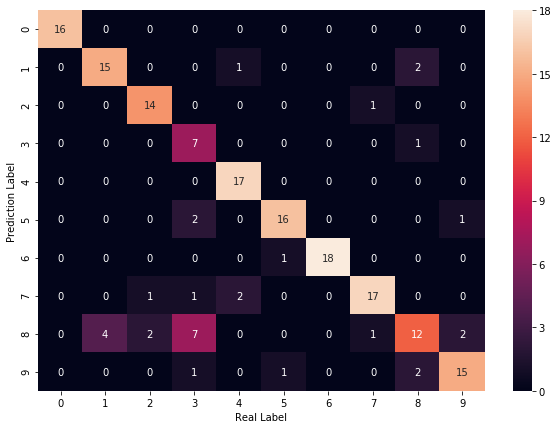

In [19]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [20]:
# 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    vote = [0,0,0,0,0,0,0,0,0,0]
    for i in range(45):
        pred_outputs = get_pred_real(i, j)
        #print(i,classes[i],pred_outputs[0][0])
        
        vote_for = classes[i][1 - pred_outputs[0]]
        vote[vote_for] += 1#1 is class 1(id:0) and 0 is class 2(id:1)
    pred_value.append(np.where(vote==np.max(vote)))        
    #print(np.array(pred).T)

In [21]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [22]:
np.sum(list_P == digits.target[:1617])/1617

0.9177489177489178

In [23]:
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)

In [24]:
np.mean(winner_fitness)

0.9810568566611733

In [25]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:967 Total connections::1233
